In [79]:
import pandas as pd
import numpy as np
from multiprocessing import Pool
import scprep
import matplotlib.pyplot as plt

In [80]:
rnaseq=scprep.io.load_csv('data/GSE109071_rpkm.txt',delimiter='\t').transpose()
rnaseq

,Adora1,Prim2,Bai3,Cflar,Gpr39,Obsl1,Syt14,Pld5,Lmx1a,Lactb2,...,ERCC_3.66210938:mix1_7.32421875:mix2.1,ERCC_3.66210938:mix1_7.32421875:mix2.2,ERCC_1.83105469:mix1_3.66210938:mix2,ERCC_0.91552734:mix1_1.83105469:mix2.1,ERCC_0.91552734:mix1_1.83105469:mix2.2,ERCC_0.45776367:mix1_0.91552734:mix2,ERCC_0.22888184:mix1_0.45776367:mix2.1,ERCC_0.22888184:mix1_0.45776367:mix2.2,ERCC_0.11444092:mix1_0.22888184:mix2,ERCC_0.05722046:mix1_0.11444092:mix2
EB_130,9.613574,58.817405,0.0,4.924209,0.0,0.000000,0.000000,0.0,0.0,31.663245,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
EB_132,0.000000,38.302642,0.0,5.001059,0.0,0.000000,0.000000,0.0,0.0,64.523462,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
EB_131,0.000000,57.633573,0.0,0.000000,0.0,10.907428,0.000000,0.0,0.0,12.388011,...,11.638625,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
EB_137,0.000000,6.493274,0.0,0.000000,0.0,21.792194,0.000000,0.0,0.0,25.838208,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
EB_133,0.000000,37.226994,0.0,6.537890,0.0,1.354559,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EB_994,0.000000,1.035441,0.0,2.910504,0.0,0.000000,0.000000,0.0,0.0,32.528321,...,0.000000,142.397791,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
EB_997,3.610834,61.711468,0.0,0.000000,0.0,2.415288,0.000000,0.0,0.0,57.236697,...,0.000000,12.762099,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
EB_988,0.000000,10.809079,0.0,0.000000,0.0,7.466116,2.718754,0.0,0.0,9.400432,...,7.029370,0.000000,22.605884,0.674139,0.0,0.00000,0.0,0.0,0.0,0.0
EB_996,0.000000,36.225301,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,10.769359,...,0.000000,0.000000,0.000000,0.000000,0.0,15.69867,0.0,0.0,0.0,0.0


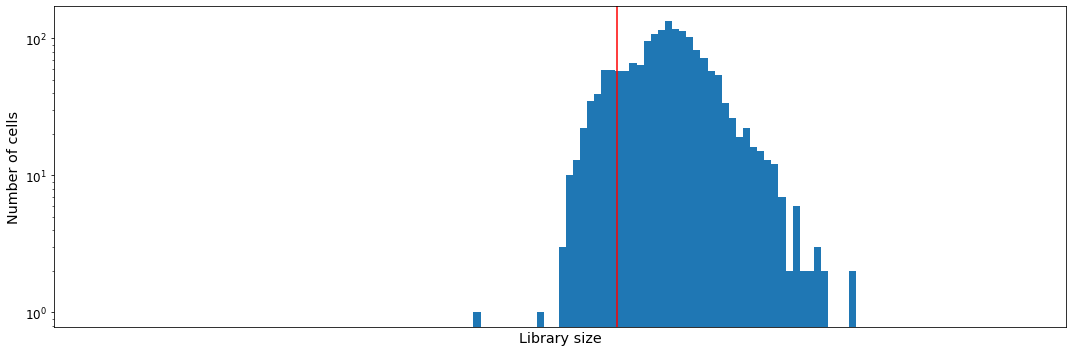

In [81]:
scprep.plot.plot_library_size(rnaseq,figsize=(15,5), cutoff=5.3*100000)
rnaseq = scprep.filter.filter_library_size(rnaseq, cutoff=5.3*100000)
rnaseq = scprep.filter.filter_rare_genes(rnaseq, min_cells=10)

In [82]:
rnaseq

,Adora1,Prim2,Bai3,Cflar,Gpr39,Obsl1,Syt14,Pld5,Lmx1a,Lactb2,...,ERCC_14.6484375:mix1_29.296875:mix2.2,ERCC_7.32421875:mix1_14.6484375:mix2,ERCC_3.66210938:mix1_7.32421875:mix2.1,ERCC_3.66210938:mix1_7.32421875:mix2.2,ERCC_1.83105469:mix1_3.66210938:mix2,ERCC_0.91552734:mix1_1.83105469:mix2.1,ERCC_0.91552734:mix1_1.83105469:mix2.2,ERCC_0.22888184:mix1_0.45776367:mix2.2,ERCC_0.11444092:mix1_0.22888184:mix2,ERCC_0.05722046:mix1_0.11444092:mix2
EB_130,9.613574,58.817405,0.0,4.924209,0.0,0.000000,0.000000,0.0,0.0,31.663245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
EB_132,0.000000,38.302642,0.0,5.001059,0.0,0.000000,0.000000,0.0,0.0,64.523462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
EB_131,0.000000,57.633573,0.0,0.000000,0.0,10.907428,0.000000,0.0,0.0,12.388011,...,0.000000,0.000000,11.638625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
EB_137,0.000000,6.493274,0.0,0.000000,0.0,21.792194,0.000000,0.0,0.0,25.838208,...,48.878896,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
EB_133,0.000000,37.226994,0.0,6.537890,0.0,1.354559,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EB_994,0.000000,1.035441,0.0,2.910504,0.0,0.000000,0.000000,0.0,0.0,32.528321,...,0.000000,0.000000,0.000000,142.397791,0.000000,0.000000,0.0,0.0,0.0,0.0
EB_997,3.610834,61.711468,0.0,0.000000,0.0,2.415288,0.000000,0.0,0.0,57.236697,...,0.000000,18.756679,0.000000,12.762099,0.000000,0.000000,0.0,0.0,0.0,0.0
EB_988,0.000000,10.809079,0.0,0.000000,0.0,7.466116,2.718754,0.0,0.0,9.400432,...,0.000000,36.542315,7.029370,0.000000,22.605884,0.674139,0.0,0.0,0.0,0.0
EB_996,0.000000,36.225301,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,10.769359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [83]:
rnaseq.T

,EB_130,EB_132,EB_131,EB_137,EB_133,EB_134,EB_139,EB_140,EB_136,EB_141,...,EB_987,EB_990,EB_993,EB_992,EB_989,EB_994,EB_997,EB_988,EB_996,EB_995
Adora1,9.613574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.511904,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,8.595000,0.000000,3.610834,0.000000,0.000000,15.224336
Prim2,58.817405,38.302642,57.633573,6.493274,37.226994,19.743580,63.465896,18.801141,0.364742,28.239915,...,0.0,0.0,0.0,21.171165,17.137642,1.035441,61.711468,10.809079,36.225301,42.824514
Bai3,0.000000,0.000000,0.000000,0.000000,0.000000,0.770735,6.813217,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cflar,4.924209,5.001059,0.000000,0.000000,6.537890,0.000000,2.286364,1.026556,0.416246,5.853220,...,0.0,0.0,0.0,0.000000,0.327700,2.910504,0.000000,0.000000,0.000000,0.132425
Gpr39,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC_0.91552734:mix1_1.83105469:mix2.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.674139,0.000000,0.000000
ERCC_0.91552734:mix1_1.83105469:mix2.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERCC_0.22888184:mix1_0.45776367:mix2.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERCC_0.11444092:mix1_0.22888184:mix2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [92]:
names = pd.read_table('data/info_ppi.txt')

In [93]:
names

,protein_external_id,preferred_name,protein_size,annotation
0,10090.ENSMUSP00000000001,Gnai3,354,Guanine nucleotide-binding protein G(k) subuni...
1,10090.ENSMUSP00000000003,Pbsn,174,Probasin
2,10090.ENSMUSP00000000010,Hoxb9,250,Homeobox protein Hox-B9; Sequence-specific tra...
3,10090.ENSMUSP00000000028,Cdc45,566,Cell division control protein 45 homolog; Requ...
4,10090.ENSMUSP00000000049,Apoh,345,Beta-2-glycoprotein 1; Binds to various kinds ...
...,...,...,...,...
22043,10090.ENSMUSP00000141161,ENSMUSG00000099894,222,annotation not available
22044,10090.ENSMUSP00000141166,ENSMUSG00000101645,938,Catenin delta-1; Binds to and inhibits the tra...
22045,10090.ENSMUSP00000141169,Carf,689,Calcium-responsive transcription factor; Acts ...
22046,10090.ENSMUSP00000141173,Gm21996,222,annotation not available


In [85]:
links = pd.read_table('data/links_ppi.txt',delimiter=' ')

In [86]:
links = links.join(names.set_index('protein_external_id'),on='protein1').join(names.set_index('protein_external_id'),on='protein2',lsuffix='_caller', rsuffix='_other')

In [87]:
links = links[['preferred_name_caller','preferred_name_other']]

In [88]:
links.columns = ['protein1','protein2']
links

,protein1,protein2
0,Gnai3,Tbk1
1,Gnai3,Sub1
2,Gnai3,Ick
3,Gnai3,Psmd3
4,Gnai3,Rab39b
...,...,...
11944801,Gm3376,Virma
11944802,Gm3376,Prpf19
11944803,Gm3376,Chtop
11944804,Gm3376,Ssty2


In [89]:
names

,protein_external_id,preferred_name,protein_size,annotation
0,10090.ENSMUSP00000000001,Gnai3,354,Guanine nucleotide-binding protein G(k) subuni...
1,10090.ENSMUSP00000000003,Pbsn,174,Probasin
2,10090.ENSMUSP00000000010,Hoxb9,250,Homeobox protein Hox-B9; Sequence-specific tra...
3,10090.ENSMUSP00000000028,Cdc45,566,Cell division control protein 45 homolog; Requ...
4,10090.ENSMUSP00000000049,Apoh,345,Beta-2-glycoprotein 1; Binds to various kinds ...
...,...,...,...,...
22043,10090.ENSMUSP00000141161,ENSMUSG00000099894,222,annotation not available
22044,10090.ENSMUSP00000141166,ENSMUSG00000101645,938,Catenin delta-1; Binds to and inhibits the tra...
22045,10090.ENSMUSP00000141169,Carf,689,Calcium-responsive transcription factor; Acts ...
22046,10090.ENSMUSP00000141173,Gm21996,222,annotation not available


In [90]:
rna_seq = pd.DataFrame(rnaseq.transpose())
rna_seq

,EB_130,EB_132,EB_131,EB_137,EB_133,EB_134,EB_139,EB_140,EB_136,EB_141,...,EB_987,EB_990,EB_993,EB_992,EB_989,EB_994,EB_997,EB_988,EB_996,EB_995
Adora1,9.613574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.511904,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,8.595000,0.000000,3.610834,0.000000,0.000000,15.224336
Prim2,58.817405,38.302642,57.633573,6.493274,37.226994,19.743580,63.465896,18.801141,0.364742,28.239915,...,0.0,0.0,0.0,21.171165,17.137642,1.035441,61.711468,10.809079,36.225301,42.824514
Bai3,0.000000,0.000000,0.000000,0.000000,0.000000,0.770735,6.813217,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cflar,4.924209,5.001059,0.000000,0.000000,6.537890,0.000000,2.286364,1.026556,0.416246,5.853220,...,0.0,0.0,0.0,0.000000,0.327700,2.910504,0.000000,0.000000,0.000000,0.132425
Gpr39,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC_0.91552734:mix1_1.83105469:mix2.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.674139,0.000000,0.000000
ERCC_0.91552734:mix1_1.83105469:mix2.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERCC_0.22888184:mix1_0.45776367:mix2.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERCC_0.11444092:mix1_0.22888184:mix2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [97]:
filt_rna_seq = rna_seq[rna_seq.index.isin(names.preferred_name.to_list())]

In [98]:
filt_rna_seq

,EB_130,EB_132,EB_131,EB_137,EB_133,EB_134,EB_139,EB_140,EB_136,EB_141,...,EB_987,EB_990,EB_993,EB_992,EB_989,EB_994,EB_997,EB_988,EB_996,EB_995
Adora1,9.613574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.511904,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.595000,0.000000,3.610834,0.000000,0.000000,15.224336
Prim2,58.817405,38.302642,57.633573,6.493274,37.226994,19.743580,63.465896,18.801141,0.364742,28.239915,...,0.000000,0.000000,0.000000,21.171165,17.137642,1.035441,61.711468,10.809079,36.225301,42.824514
Bai3,0.000000,0.000000,0.000000,0.000000,0.000000,0.770735,6.813217,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cflar,4.924209,5.001059,0.000000,0.000000,6.537890,0.000000,2.286364,1.026556,0.416246,5.853220,...,0.000000,0.000000,0.000000,0.000000,0.327700,2.910504,0.000000,0.000000,0.000000,0.132425
Gpr39,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nanos1,0.000000,0.000000,0.000000,0.000000,7.373845,0.000000,0.000000,3.152669,0.091743,0.000000,...,0.485935,1.108823,0.000000,0.273084,0.000000,0.000000,0.000000,0.092162,0.000000,0.213298
Prdx3,121.213330,68.318959,52.265076,26.638153,56.633979,168.619985,31.822254,87.414247,83.794154,61.364558,...,35.665295,93.438874,63.446936,65.325377,123.393928,18.407203,59.072181,191.653696,321.571725,97.215808
Sfxn4,0.000000,10.844478,0.000000,0.000000,0.000000,1.038935,0.000000,0.000000,2.902975,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.990252,0.000000,12.858007,0.000000,0.000000
Gm7102,0.000000,0.000000,5.536230,3.160273,3.680292,0.873563,0.000000,1.525084,0.887598,1.412091,...,0.000000,2.681932,4.577328,1.321025,0.425555,0.000000,0.000000,2.006227,2.614743,3.611354


In [106]:
filt_links = links[links['protein1'].isin(filt_rna_seq.index.to_list()) & links['protein2'].isin(filt_rna_seq.index.to_list())]

In [107]:
filt_links

,protein1,protein2
0,Gnai3,Tbk1
1,Gnai3,Sub1
2,Gnai3,Ick
3,Gnai3,Psmd3
4,Gnai3,Rab39b
...,...,...
11944447,Carf,Crem
11944448,Carf,Mef2c
11944449,Carf,Ntn1
11944450,Carf,Snf8


In [109]:
mydict = {k: v for v, k in enumerate(filt_rna_seq.index.to_list())}
mydict

{'Adora1': 0,
 'Prim2': 1,
 'Bai3': 2,
 'Cflar': 3,
 'Gpr39': 4,
 'Obsl1': 5,
 'Syt14': 6,
 'Pld5': 7,
 'Lmx1a': 8,
 'Lactb2': 9,
 'Efhc1': 10,
 'Khdrbs2': 11,
 'Lonrf2': 12,
 'Actr1b': 13,
 'Dnah7b': 14,
 'Pgap1': 15,
 'Bmpr2': 16,
 'Pard3b': 17,
 'Spag16': 18,
 'Usp37': 19,
 'Xrcc5': 20,
 'Dock10': 21,
 'Sh3bp4': 22,
 'Dis3l2': 23,
 'Slc16a14': 24,
 'Pask': 25,
 'Cdh20': 26,
 'Cdh7': 27,
 'Clasp1': 28,
 'Cdk18': 29,
 'Rab3gap1': 30,
 'Mapkapk2': 31,
 'Rnpep': 32,
 'Camsap2': 33,
 'Aspm': 34,
 'Kcnt2': 35,
 'Pla2g4a': 36,
 'Cdc73': 37,
 'Brinp2': 38,
 'Nmnat2': 39,
 'Stx6': 40,
 'Rasal2': 41,
 'Rcsd1': 42,
 'Rabgap1l': 43,
 'Rgs7': 44,
 'Trp53bp2': 45,
 'Itpkb': 46,
 'Akt3': 47,
 'Smyd3': 48,
 'Cnih3': 49,
 'Ptpn14': 50,
 'Rps6kc1': 51,
 'Tgfb2': 52,
 'Esrrg': 53,
 'Xkr4': 54,
 'Rgs20': 55,
 'Atp6v1h': 56,
 'Mybl1': 57,
 'Adhfe1': 58,
 'Sgk3': 59,
 'Tcf24': 60,
 'Arfgef1': 61,
 'Cspp1': 62,
 'Prex2': 63,
 'Sulf1': 64,
 'Ncoa2': 65,
 'Slco5a1': 66,
 'Eya1': 67,
 'Stau2': 68,
 'Rdh10': 

In [110]:
for i, row in filt_links.iterrows():
    if i%10000 == 0:
        print(i)
    filt_links.at[i,'protein1'] =mydict[row[0]]
    filt_links.at[i,'protein2'] =mydict[row[1]]

0
10000
20000
30000
40000
50000
70000
80000
100000
110000
120000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
300000
310000
320000
330000
340000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
480000
490000
500000
510000
520000
570000
580000
590000
610000
620000
630000
640000
650000
660000
680000
690000
700000
710000
730000
740000
750000
760000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1040000
1050000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1150000
1160000
1170000
1180000
1190000
1200000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1360000
1380000
1400000
1410000
1430000
1440000
1450000
1460000
1470000
1480000
1490000
1510000
1520000
1530000
1540000
1550000
1560000
1580000
1590000
1610000
1620000
1630000
1

In [111]:
i

11944451

In [112]:
filt_links[['protein1','protein2']]

,protein1,protein2
0,2253,9706
1,2253,12881
2,2253,7778
3,2253,10723
4,2253,8869
...,...,...
11944447,435,14541
11944448,435,11687
11944449,435,9935
11944450,435,10665


In [114]:
filt_rna_seq = scprep.transform.sqrt(scprep.normalize.library_size_normalize(filt_rna_seq))
filt_rna_seq

,EB_130,EB_132,EB_131,EB_137,EB_133,EB_134,EB_139,EB_140,EB_136,EB_141,...,EB_987,EB_990,EB_993,EB_992,EB_989,EB_994,EB_997,EB_988,EB_996,EB_995
Adora1,5.551952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.837950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.249600,0.000000,3.402570,0.000000,0.000000,6.986706
Prim2,3.660107,2.953624,3.623086,1.216110,2.911856,2.120576,3.801991,2.069345,0.288226,2.536136,...,0.000000,0.000000,0.000000,2.195904,1.975679,0.485628,3.749072,1.569044,2.872413,3.123109
Bai3,0.000000,0.000000,0.000000,0.000000,0.000000,11.530010,34.280983,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cflar,4.751183,4.788114,0.000000,0.000000,5.474599,0.000000,3.237473,2.169326,1.381365,5.180014,...,0.000000,0.000000,0.000000,0.000000,1.225665,3.652730,0.000000,0.000000,0.000000,0.779147
Gpr39,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nanos1,0.000000,0.000000,0.000000,0.000000,9.362294,0.000000,0.000000,6.121734,1.044289,0.000000,...,2.403391,3.630500,0.000000,1.801703,0.000000,0.000000,0.000000,1.046674,0.000000,1.592313
Prdx3,2.848610,2.138594,1.870525,1.335395,1.947136,3.359791,1.459564,2.419072,2.368452,2.026826,...,1.545186,2.501045,2.060929,2.091215,2.874118,1.110073,1.988608,3.581924,4.639772,2.551092
Sfxn4,0.000000,6.470038,0.000000,0.000000,0.000000,2.002612,0.000000,0.000000,3.347527,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.890992,0.000000,7.045135,0.000000,0.000000
Gm7102,0.000000,0.000000,5.893265,4.452575,4.804963,2.340971,0.000000,3.093113,2.359701,2.976324,...,0.000000,4.101784,5.358644,2.878753,1.633905,0.000000,0.000000,3.547635,4.050078,4.759748


In [117]:
np.save('mouse_rna.npy',filt_rna_seq)
np.save('mouse_ppi.npy',filt_links[['protein1','protein2']])

In [116]:
filt_rna_seq.to_csv('mousernaSeq.csv')